# Coefficient formulas
M. C. M. Wright, ISVR, University of Southampton

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Overview
The formulas we obtained for the coefficients $a_n$ and $b_n$ can be integrated by hand to obtain explicit formulas for them, as long as an expression is known for the signal in question. Doing so often leads to some difficult integrals, making it an excellent source of maths exam questions. We'll go through the procedure for our sawtooth signal, and it's worth being able to derive coefficient formulas this way, but it's more important to understand the underlying concepts. The nature of the procedure means there won't be much computation in this notebook, though we'll use some to find a mathematical expression for the sawtooth function.

In the last notebook we established that if a signal $y(t)$ with period $T$ has a convergent Fourier series representation of the form 

$$
y(t) = \frac{1}{2} a_0 + \sum_{n=1}^\infty \left[ 
a_n\cos\left(\frac{2\pi n t}{T}\right) +
b_n\sin\left(\frac{2\pi n t}{T}\right) \right],
$$

then the coefficients $a_n$ and $b_n$ are given by

$$
a_n = \frac{2}{T}\int_q^{q+T} y(t)\cos\left(\frac{2\pi nt}{T}\right)\,\mathrm{d}t,\quad\text{and}\quad
b_n = \frac{2}{T}\int_q^{q+T} y(t)\sin\left(\frac{2\pi nt}{T}\right)\,\mathrm{d}t.
$$

We calculated numerical values of coefficients for the sawtooth example by approximating the integral by a summation. In this notebook we'll perform the integrations symbolically to obtain formulas for the coefficients.

The result  is independent of $q$ but choosing $q = -T/2$ allows us to simplify the integrals if $y(t)$ is odd, so that $y(-t) = -y(t)$, or even, so that $y(-t) = y(t)$ (it might not be either). We'll rewrite the integrals with this value of $q$:

$$
a_n = \frac{2}{T}\int\limits_{-T/2}^{T/2} y(t)\cos\left(\frac{2\pi nt}{T}\right)\,\mathrm{d}t,\quad\text{and}\quad
b_n = \frac{2}{T}\int\limits_{-T/2}^{T/2} y(t)\sin\left(\frac{2\pi nt}{T}\right)\,\mathrm{d}t.
$$


#### Exercises
Record the answers to the following questions in a markdown cell.
- Is the sine function odd, even or neither?
- Is the cosine function odd, even or neither?
- If $y(t)$ is odd which set of coefficients vanishes? How can the formula for the other set be simplified?
- If $y(t)$ is even which set of coefficients vanishes? How can the formula for the other set be simplified?

## Note
The question of whether a function is odd, even or neither can only be answered with reference to a time axis with a defined $t=0$. In many applications this is arbitrary, so we can choose it to be wherever makes things easiest. But that only matters when we're performing the integrations by hand; oddness or evenness has no physical significance for most signals.

## Back to the sawtooth.
In order to perform the integrals we need a symbolic form for the sawtooth function $S(t)$ over the interval we're interested in. We'll plot it first:

In [2]:
import scipy.signal

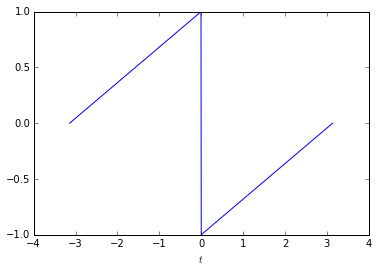

In [3]:
T = 2*pi
t = linspace(-T/2, T/2, 1000)
plot(t, scipy.signal.sawtooth(t))
xlabel('$t$')

We can confirm that it's an odd function by plotting $-y(-t)$ as well:

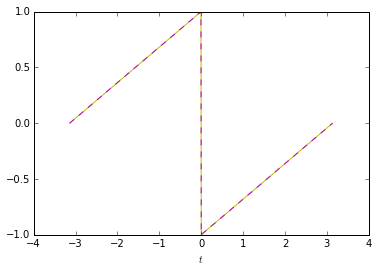

In [4]:
T = 2*pi
t = linspace(-T/2, T/2, 1000)
plot(t, scipy.signal.sawtooth(t), 'y-',
    t, -scipy.signal.sawtooth(-t), 'm--')
xlabel('$t$')

We can probably write down an expression for this function, but it would be even easier to do so if its period was 2 instead of $2\pi$. Let's defined a new variable $\tau = t/\pi$, find a formula for that  and then rewrite it in terms of $t$. 

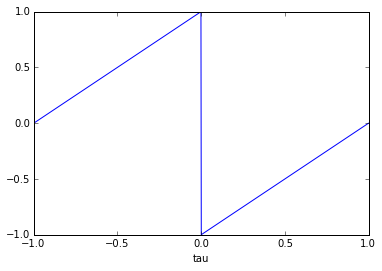

In [5]:
T = 2*pi
t = linspace(-T/2, T/2, 1000)
tau = t/pi
plot(tau, scipy.signal.sawtooth(t))  # Study this line carefully!
xlabel('tau')

By inspection we can write an expression for the function of $\tau$ (which we give the name $S^\ast$ to distinguish it from $S$):

$$
S^\ast(\tau) = \begin{cases}
\tau + 1, & -1 \le \tau < 0 \\
\tau - 1, & 0 \le \tau < 1
\end{cases}
$$

(this doesn't give the right answer outside this interval but we don't need it to).
We can create a NumPy function that implements it:

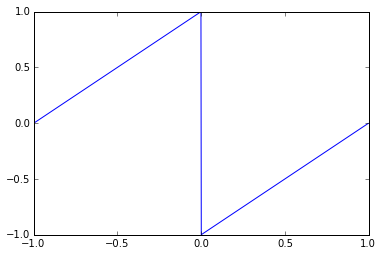

In [6]:
def S_star_scalar(tau):
    if -1 <= tau <0:
        return tau + 1
    if 0 <= tau < 1:
        return tau - 1

S_star = vectorize(S_star_scalar)

tau = linspace(-1, 1, 1000)
plot(tau, S_star(tau))

We can then write 

$$
S(t) = S^\ast(\tau) = S^\ast(\pi t) = \begin{cases}
\tau + 1, & -1 \le \pi t < 0 \\
\tau - 1, & 0 \le \pi t < 1
\end{cases}
= \begin{cases}
t/\pi + 1, & -\pi \le  t < 0 \\
t/\pi - 1, & 0 \le  t < \pi
\end{cases}
$$

To check this is wite we can define another Python function that implements $S(t)$ and compare it with the original.

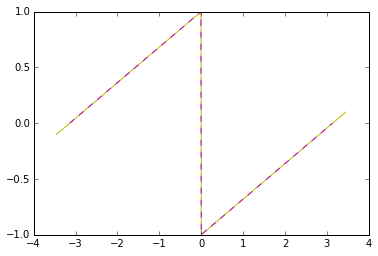

In [7]:
def S_scalar(t):
    if -pi <= t < 0:
        return t/pi + 1
    if 0 <= t < pi:
        return t/pi - 1

S = vectorize(S_scalar)

tau = linspace(-1.1, 1.1, 1000)
t = pi*tau
plot(t, scipy.signal.sawtooth(t), 'y-',
     t, S(t), 'm--')

We can now get to work on the integrals. First we have

$$
a_n = \frac{1}{\pi}\int\limits_{-\pi}^{\pi} S(t)\cos(nt)\,\mathrm{d}t = 0,
$$

(if you're not sure why go through the exercises above again, or look for hints in the previous notebook). Then we have

$$
\begin{align}
b_n &= \frac{1}{\pi}\int\limits_{-\pi}^{\pi} S(t)\sin(nt)\,\mathrm{d}t, \\
& = \frac{1}{\pi}\left(
\int\limits_{-\pi}^{0} S(t)
\sin(nt)\,\mathrm{d}t
+ \int\limits_{0}^{\pi} S(t)
\sin(nt)\,\mathrm{d}t
\right)
\end{align}
$$

and since both $S(t)$ and $\sin()$ are both odd functions both integrals must have the same value and

$$
\begin{align}
b_n &=  \frac{1}{\pi}\left(
2\int\limits_{0}^{\pi} S(t)
\sin(nt)\,\mathrm{d}t \right)\\
&= \frac{2}{\pi}\int\limits_{0}^{\pi} \left(\frac{t}{\pi} - 1 \right)
\sin(nt)\,\mathrm{d}t \\
&= \frac{2}{\pi^2}\int\limits_{0}^{\pi} 
t\sin(nt)\,\mathrm{d}t -
\frac{2}{\pi}\int\limits_{0}^{\pi} \tag{$\ast$}
\sin(nt)\,\mathrm{d}t
\end{align}
$$

We can rewrite the first integral using integration by parts.

$$
\begin{align}
\frac{2}{\pi^2}\int\limits_{0}^{\pi} 
t\sin(nt)\,\mathrm{d}t &= \frac{2}{\pi^2}\left\{
\left[ t\left(\frac{-\cos(nt)}{n}\right) \right]_0^\pi
- \int\limits_0^\pi (1)\left(\frac{-\cos(nt)}{n}\right)
\right\} \, \mathrm{d}t \\
&= \frac{2}{\pi^2}\left\{
\left[ t\left(\frac{-\cos(nt)}{n}\right) \right]_0^\pi
- \left[\frac{-\sin(nt)}{n^2}\right]_0^\pi
\right\},\\
&= \frac{2}{\pi^2}\left\{
\left(-\pi\frac{\cos(n\pi)}{n} - 0 \right) -
\left( -\frac{\sin(n\pi)}{n^2} - 0\right)
\right\},\\
&= -\frac{2}{\pi}\frac{\cos(n\pi)}{n} - \frac{2}{n^2\pi^2}\sin(n\pi),
\end{align}
$$
the second term of which vanishes because $\sin(n\pi) = 0 $ for integer $n$.

The second integral in $(\ast)$ is

$$
\begin{align}
\frac{2}{\pi}\int\limits_{0}^{\pi} \tag{$\ast$}
\sin(nt)\,\mathrm{d}t &=
\frac{2}{\pi}\left[\frac{-\cos(nt)}{n}\right]_0^\pi \\
&= \frac{2}{\pi}\left(\frac{-\cos(n\pi)}{n} + \frac{1}{n}\right),
\end{align}
$$

so we have 

$$
\begin{align}
b_n &= -\frac{2}{\pi}\frac{\cos(n\pi)}{n} - \frac{2}{\pi}\left(\frac{-\cos(n\pi)}{n} + \frac{1}{n}\right) \\
 &= -\frac{2}{\pi n},
\end{align}
$$

which we demonstrated led to a Fourier series that converged to the sawtooth function two notebooks ago.

#### Exercise
Do everything that we've done for the sawtooth with the square-wave signal calculated by `scipy.signal.square(t)` (which we'll call $P(t)$) i.e.:
 1. Plot it and find its period.
 2. Plot its products with sine and cosine waves whose frequencies are integer multiples $m$ of the square-wave's.
 3. Use `sum()` to estimate its inner products with these sines and cosines, and use `stem()` to plot how they vary with $m$.
 4. Write the formula for the coefficients of its Fourier series representation.
 5. Perform the integrations to obtain formulae for these coefficients.
 6. Use these formula to plot partial sums of the Fourier series for the square-wave and compare them to the original to examine the convergence and check for Gibbs' phenomenon.
 7. Use `stem()` to plot how the amplitudes (in dB) decay with frequency.

## Summary
[Edit this cell to make a summary of everything you've learned from this notebook.]